# PDF Extractor

This notebook aims to extract relevant tables from PDF . 

Libraries used 
* **Tabula** - https://tabula-py.readthedocs.io/en/latest/tabula.html

* **Camelot** - https://www.analyticsvidhya.com/blog/2020/08/how-to-extract-tabular-data-from-pdf-document-using-camelot-in-python/

PDF Used from provided Dataset - 
1. [PDF of custodianreit](https://www.custodianreit.com/wp-content/uploads/2020/07/4825_Custodian_Annual_Report_2020_Hyperlink_pages.pdf) : A numerical based table

2. [PDF of Warehouse Reit](https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_WHR.L_2020.pdf) : It is a majorly text which is formatted in form of tabular.


In [ ]:
!wget https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/LSE_WHR.L_2020.pdf

## Display PDF Page

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

'Below is the section of PDF of Custodianreit Used for table extractions'

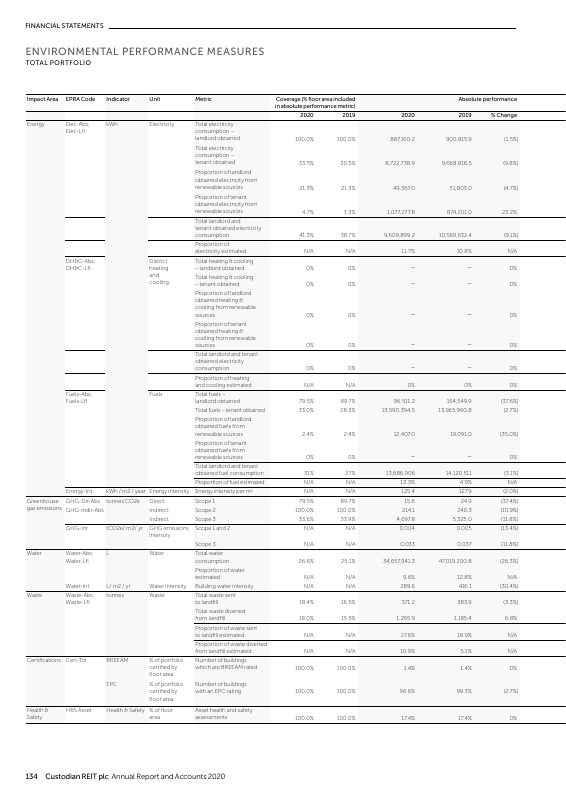

In [12]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('/content/4825_Custodian_Annual_Report_2020_Hyperlink_pages1.pdf', 'rb').read(), size=800)
display("Below is the section of PDF of Custodianreit Used for table extractions")
display(images[1])

'Below is the section of PDF of Warehouse Reit Used for table extractions'

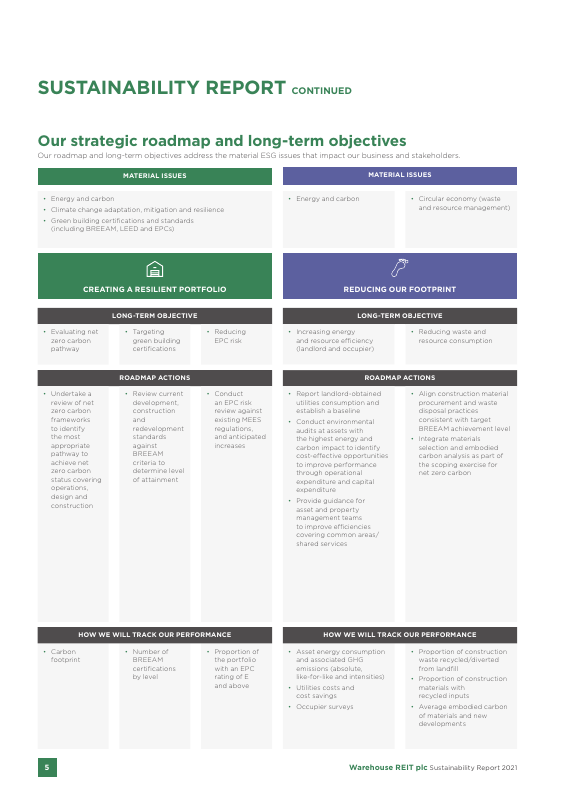

In [44]:
images = convert_from_bytes(open('/content/LSE_WHR.L_2020.pdf', 'rb').read(), size=800)
display("Below is the section of PDF of Warehouse Reit Used for table extractions")
display(images[5])

## Table Extraction : Tabula Py Library

In [ ]:
!pip install tabula-py

In [10]:
import tabula

df = tabula.read_pdf("/content/4825_Custodian_Annual_Report_2020_Hyperlink_pages.pdf",pages='136')

In [19]:
# Table from Custodianreit
df[0] 

,Impact Area,EPRA Code,Indicator,Unit,Metric,Coverage (% floor area included\rin absolute performance metric),Absolute performance,Unnamed: 0,Unnamed: 1
0,NaN,NaN,NaN,NaN,NaN,20202019,202,2019,% Change
1,Energy,Elec-Abs;\rElec-Lfl,kWh,Electricity,Total electricity\rconsumption –\rlandlord obt...,100.0%100.0%\r33.5%30.5%\r21.3%21.3%\r4.7%3.3%,"887,160.\r8,722,738.\r49,367.\r1,077,277.","900,815.\r9,668,816.5\r51,803.\r874,201.0",(1.5%)\r(9.8%)\r(4.7%)\r23.2%
2,NaN,NaN,NaN,Total landlord and\rtenant obtained electricit...,41.3%38.7%,"9,609,899.2","10,569,632.4",(9.1%),NaN
3,NaN,NaN,NaN,Proportion of\relectricity estimated,N/AN/A,11.7,10.8%,N/A,NaN
4,NaN,DH&C-Abs;\rDH&C-Lfl,District\rheating\rand\rcooling,Total heating & cooling\r– landlord obtained\r...,0%0%\r0%0%\r0%0%\r0%0%,NaN,NaN,0%\r0%\r0%\r0%,NaN
5,NaN,NaN,NaN,Total landlord and tenant\robtained electricit...,0%0%,NaN,NaN,0%,NaN
6,NaN,NaN,NaN,Proportion of heating\rand cooling estimated,N/AN/A,0%,0%,0%,NaN
7,NaN,Fuels-Abs;\rFuels-Lfl,Fuels,Total fuels –\rlandlord obtained\rTotal fuels ...,79.5%89.7%\r33.0%28.3%\r2.4%2.4%\r0%0%,"96,511.2\r13,590,394.5\r12,407.0","154,549.9\r13,965,960.8\r19,091.0",(37.6%)\r(2.7%)\r(35.0%)\r0%,NaN
8,NaN,NaN,NaN,Total landlord and tenant\robtained fuel consu...,31%27%,"13,686,906","14,120,511",(3.1%),NaN
9,NaN,NaN,NaN,Proportion of fuel estimated,N/AN/A,13.3%,4.9%,N/A,NaN


In [31]:
# Extraction for Text Based Table : WareHouse Reit
df = tabula.read_pdf("/content/LSE_WHR.L_2020.pdf",pages='6')

In [33]:
df

[]

## Table Extraction :Camelot 



> **Note**:  Install camelot-py[cv] cv version . If installed any other versions earlier unistall those then again install cv version.

> https://stackoverflow.com/questions/61913882/importerror-cannot-import-name-tablelist-from-camelot-core



In [ ]:
!pip uninstall camelot
!pip uninstall camelot-py
!ypip install camelot-py[cv]

In [13]:
import camelot
#table = camelot.read_pdf('/content/4825_Custodian_Annual_Report_2020_Hyperlink_pages1.pdf')
tables2=camelot.read_pdf('/content/4825_Custodian_Annual_Report_2020_Hyperlink_pages1.pdf', flavor='stream', pages='1-4')


/usr/local/lib/python3.7/dist-packages/camelot/parsers/stream.py:365: UserWarning: No tables found in table area 1
  warnings.warn(f"No tables found in table area {table_idx + 1}")


In [18]:
tables2[1].df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Impact Area,EPRA Code,Indicator,Unit,Metric,Coverage (% floor area included,,,Absolute performance,,,Coverage (% floor area included,,,Like-for-like performance
1,,,,,,in absolute performance metric),,,,,,in like-for-like performance metric),,,
2,,,,,,2020,2019,2020,2019,% Change,2020,2019,2020,2019,% Change
3,Energy,Elec-Abs;,kWh,Electricity,Total electricity,,,,,,,,,,
4,,Elec-Lfl,,,consumption –,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,,,EPC,% of portfolio,Number of buildings,,,,,,,,,,
76,,,,certified by,with an EPC rating,100.0%,100.0%,96.6%,99.3%,(2.7%),100.0%,100.0%,96.4%,100.0%,(3.7%)
77,,,,floor area,,,,,,,,,,,
78,Health &,H&S Asset,Health & Safety,% of floor,Asset health and safety,,,,,,,,,,


In [40]:
# Extraction for Text Based Table : WareHouse Reit
tables2=camelot.read_pdf('/content/LSE_WHR.L_2020.pdf', flavor='stream', pages='6')


In [41]:
tables2[0].df

,0,1,2
0,SUSTAINABILITY REPORT CONTINUED,,
1,Our strategic roadmap and long-term objectives,,
2,Our roadmap and long-term objectives address t...,,
3,,MATERIAL ISSUES,MATERIAL ISSUES
4,• Energy and carbon,,• Energy and carbon\n• Circular economy (waste
5,,,and resource management)
6,,"• Climate change adaptation, mitigation and r...",
7,,• Green building certifications and standards,
8,,"(including BREEAM, LEED and EPCs)",
9,,CREATING A RESILIENT PORTFOLIO,REDUCING OUR FOOTPRINT


# Observations

1. Using tabula py we notice that if in same cell the text is written in new line then it keeps them in same row seperate by  `\r` escape character. **Whereas** Camelot when converting them into dataframe seperates the new line in same row as new row. This appears neat in output but can pose problem when doing analysis.

2. When using a text based table (Warehouse Reit) which seems more of image : Tabula py is unable to detect it as table **whereas** Camelot does detects and parses it as table 

## Splitting PDF : PyPDF2

This section is for splitting pdf into relevant sub pdf based on page number provided here : [List of 500 Datatsets](https://docs.google.com/spreadsheets/d/1y4tmRn3opo-M8us3g3eLn4CkRFSdvFK6sooXAZd-DeE/edit#gid=0)

*Splitting Strategy*- [134,138] this will generate 3 pdf splitted at 0-134,134-138,138-ending page 

In [2]:
!pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 10.3 MB/s 


In [7]:
# importing the required modules
import PyPDF2
 
def PDFsplit(pdf, splits):
    # creating input pdf file object
    pdfFileObj = open(pdf, 'rb')
     
    # creating pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
     
    # starting index of first slice
    start = 1
     
    # starting index of last slice
    end = splits[0]
     
     
    for i in range(len(splits)+1):
        # creating pdf writer object for (i+1)th split
        pdfWriter = PyPDF2.PdfFileWriter()
         
        # output pdf file name
        outputpdf = pdf.split('.pdf')[0] + str(i) + '.pdf'
         
        # adding pages to pdf writer object
        for page in range(start,end):
            pdfWriter.addPage(pdfReader.getPage(page))
         
        # writing split pdf pages to pdf file
        with open(outputpdf, "wb") as f:
            pdfWriter.write(f)
 
        # interchanging page split start position for next split
        start = end
        try:
            # setting split end position for next split
            end = splits[i+1]
        except IndexError:
            # setting split end position for last split
            end = pdfReader.numPages
         
    # closing the input pdf file object
    pdfFileObj.close()
             

In [12]:
PDFsplit("/content/4825_Custodian_Annual_Report_2020_Hyperlink_pages.pdf",[134,139])